# Library import and file tracing

In [ ]:
!pip install mne

**Tracing file path**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from glob import glob
import os
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold,GridSearchCV,cross_val_score,cross_validate
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
file_path = glob("/content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/*.edf")
file_path

['/content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h01.edf',
 '/content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h03.edf',
 '/content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h02.edf',
 '/content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h04.edf',
 '/content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h05.edf',
 '/content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h08.edf',
 '/content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h07.edf',
 '/content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h06.edf',
 '/content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h10.edf',
 '/content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h13.edf',
 '/content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h09.edf',
 '/content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h11.edf',
 '/content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h14.edf',
 '/content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h12.edf',
 '/content/drive/MyD


# **Features Extraction**


In [ ]:
#healthy and patient seperation
healthy_file_path =[i for i in file_path if "h" in i.split("dataverse_files/")[1]]
patient_file_path =[i for i in file_path if "s" in i.split("dataverse_files/")[1]]
print(len(healthy_file_path),len(patient_file_path))

14 14


In [ ]:
#reading &filtering data
def read_data(file_path):
  data = mne.io.read_raw_edf(file_path,preload =True)
  data.set_eeg_reference()
  data.filter(l_freq =0.5, h_freq =45) #frequency range
  epochs=mne.make_fixed_length_epochs(data, duration = 5, overlap=1)
  array = epochs.get_data()
  return array

In [ ]:
#no. of epochs , channels, length of singal
control_epochs_array = [read_data(i) for i in healthy_file_path]
patient_epochs_array = [read_data(i) for i in patient_file_path]

Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
231 matching events found


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 231 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 227 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
231 matching events found


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 231 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 236249  =      0.000 ...   944.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


Not setting metadata
236 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 236 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


Not setting metadata
227 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 227 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Not setting metadata
227 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 227 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 232499  =      0.000 ...   929.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 278749  =      0.000 ...  1114.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Not setting metadata
278 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 278 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 241249  =      0.000 ...   964.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 226249  =      0.000 ...   904.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Not setting metadata
226 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 226 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 228749  =      0.000 ...   914.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


Not setting metadata
228 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 228 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 216249  =      0.000 ...   864.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


Not setting metadata
216 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 216 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/h12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 224999  =      0.000 ...   899.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/s02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 286249  =      0.000 ...  1144.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
286 matching events found
No baseline corre

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/s01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211249  =      0.000 ...   844.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
211 matching events found
No baseline corre

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 240999  =      0.000 ...   963.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
240 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 240 events and 1250 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/s05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 222499  =      0.000 ...   889.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
222 matching events found
No baseline corre

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/s04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 301249  =      0.000 ...  1204.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
301 matching events found
No baseline corre

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/s07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 336499  =      0.000 ...  1345.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
336 matching events found
No baseline corre

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/s06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 184999  =      0.000 ...   739.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
184 matching events found
No baseline corre

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Reading 0 ... 296249  =      0.000 ...  1184.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
296 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 296 events and 1250 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/s08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227749  =      0.000 ...   910.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
227 matching events found
No baseline corre

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/s10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 212499  =      0.000 ...   849.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
212 matching events found
No baseline corre

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/s12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 271749  =      0.000 ...  1086.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
271 matching events found
No baseline corre

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/s14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 542499  =      0.000 ...  2169.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
542 matching events found
No baseline corre

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/s11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 339999  =      0.000 ...  1359.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
339 matching events found
No baseline corre

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/CSE424/Dataset/EEG/dataverse_files/s13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 283749  =      0.000 ...  1134.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
283 matching events found
No baseline corre

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


0 bad epochs dropped


In [ ]:
control_epoch_labels = [len(i)*[0] for i in control_epochs_array]
patient_epoch_labels = [len(i)*[1] for i in patient_epochs_array]
len(control_epochs_array),len(patient_epochs_array)

(14, 14)

In [ ]:
data_list = control_epochs_array + patient_epochs_array
label_list = control_epoch_labels + patient_epoch_labels

In [ ]:
group_list = [[i]*len(j) for i,j in enumerate(data_list)]
len(group_list)

28

In [ ]:
data_array = np.vstack((data_list))
label_array = np.hstack(label_list)
group_array = np.hstack(group_list)
print(data_array.shape, label_array.shape, group_array.shape)

(7201, 19, 1250) (7201,) (7201,)


**Necessary mathematical functions**

In [ ]:
from scipy import stats
def mean(data):
    return np.mean(data,axis=-1)
def std(data):
    return np.std(data,axis=-1)
def ptp(data):
    return np.ptp(data,axis=-1)
def var(data):
        return np.var(data,axis=-1)
def minim(data):
      return np.min(data,axis=-1)
def maxim(data):
      return np.max(data,axis=-1)
def argminim(data):
      return np.argmin(data,axis=-1)
def argmaxim(data):
      return np.argmax(data,axis=-1)
def mean_square(data):
      return np.mean(data**2,axis=-1)
def rms(data):
      return  np.sqrt(np.mean(data**2,axis=-1))
def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=-1)),axis=-1)
def skewness(data):
    return stats.skew(data,axis=-1)
def kurtosis(data):
    return stats.kurtosis(data,axis=-1)
def concatenate_features(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),argminim(data),argmaxim(data),mean_square(data),rms(data),abs_diffs_signal(data),skewness(data),kurtosis(data)),axis=-1)

**Feature array**

In [ ]:
from tqdm import tqdm_notebook
features=[]
for data in tqdm_notebook(data_array):
    features.append(concatenate_features(data))
features=np.array(features)
features.shape

<ipython-input-14-69f2cdc0fdb1>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data in tqdm_notebook(data_array):


  0%|          | 0/7201 [00:00<?, ?it/s]

(7201, 247)

# EEG graph plot

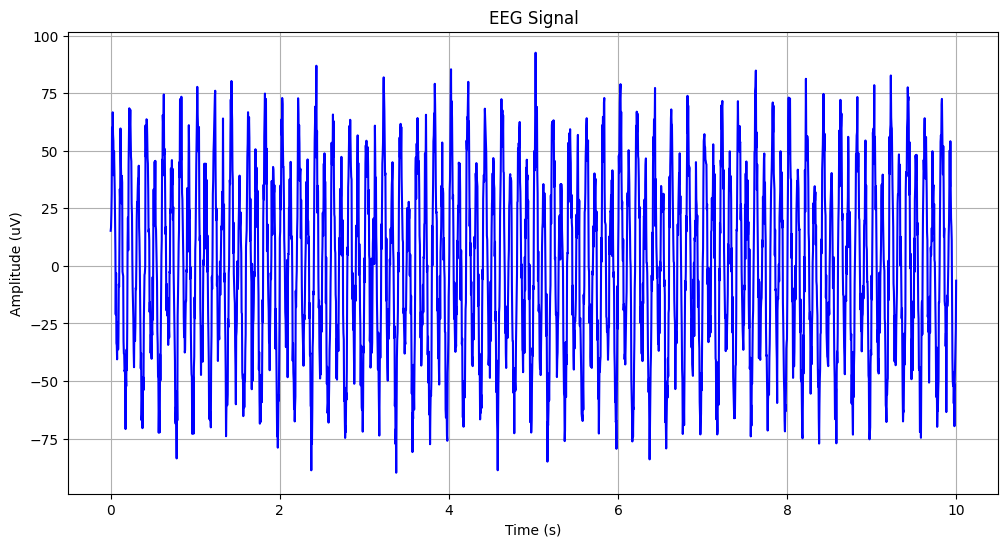

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fs = 250 #sampling rate
t = np.arange(0, 10, 1/fs)
eeg_signal = 50 * np.sin(2 * np.pi * 10 * t) + 20 * np.sin(2 * np.pi * 5 * t) + 10 * np.random.randn(len(t))


plt.figure(figsize=(12, 6))
plt.plot(t, eeg_signal, color='blue')
plt.title('EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.grid(True)
plt.show()


# Classification models

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold,GridSearchCV,cross_val_score,cross_validate

clf=LogisticRegression()
gkf=GroupKFold(n_splits=5)

param_grid_lor = {'classifier__C': [0.01,0.05,0.1,0.5, 1,2,3,4,5,8, 10,12,15]}

pipe_lor =Pipeline([('scaler',StandardScaler()),('classifier',clf)])

gscv_lor = GridSearchCV(pipe_lor,param_grid_lor,cv=gkf,n_jobs=16)
gscv_lor.fit(features,label_array,groups=group_array)

predictions_lor = gscv_lor.predict(features)
accuracy_lor = metrics.accuracy_score(label_array, predictions_lor)
precision_lor = metrics.precision_score(label_array, predictions_lor)
recall_lor = metrics.recall_score(label_array, predictions_lor)

print("Accuracy: ", accuracy_lor)
print("Precision: ", precision_lor)
print("Recall: ", recall_lor)

Accuracy:  0.9040411054020275
Precision:  0.9170719221909394
Recall:  0.9070886075949367


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, GroupKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics

clf_knn = KNeighborsClassifier()

pipe_knn = Pipeline([('scaler', StandardScaler()), ('clf', clf_knn)])


param_grid_knn = {'clf__n_neighbors': [3, 5, 7, 9]}

gkf_knn = GroupKFold(n_splits=5)


gscv_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=gkf_knn, n_jobs=12)
gscv_knn.fit(features, label_array, groups=group_array)


predictions_knn = gscv_knn.predict(features)
accuracy_knn = metrics.accuracy_score(label_array, predictions_knn)
precision_knn = metrics.precision_score(label_array, predictions_knn)
recall_knn = metrics.recall_score(label_array, predictions_knn)

print("KNN - Accuracy: ", accuracy_knn)
print("KNN - Precision: ", precision_knn)
print("KNN - Recall: ", recall_knn)



KNN - Accuracy:  0.8391890015275656
KNN - Precision:  0.8391642371234208
KNN - Recall:  0.8744303797468355


# SVM

**Linear kernal**

In [ ]:
clf_svm_linear = SVC(kernel='linear')


pipe_svm_linear = Pipeline([('scaler', StandardScaler()), ('clf', clf_svm_linear)])


param_grid_svm_linear = {'clf__C': [0.1, 0.5, 1, 2, 5, 10]}

# cross-validation with 5 folds
gkf_svm_linear = GroupKFold(n_splits=5)

gscv_svm_linear = GridSearchCV(pipe_svm_linear, param_grid_svm_linear, cv=gkf_svm_linear, n_jobs=12)
gscv_svm_linear.fit(features, label_array, groups=group_array)

predictions_svm_linear = gscv_svm_linear.predict(features)
accuracy_svm_linear = metrics.accuracy_score(label_array, predictions_svm_linear)
precision_svm_linear = metrics.precision_score(label_array, predictions_svm_linear)
recall_svm_linear = metrics.recall_score(label_array, predictions_svm_linear)

print("Accuracy SVM linear: ", accuracy_svm_linear)
print("Precision SVM Linear: ", precision_svm_linear)
print("Recall SVM Linear: ", recall_svm_linear)

Accuracy SVM linear:  0.9201499791695598
Precision SVM Linear:  0.9321382842509603
Recall SVM Linear:  0.9215189873417722


**RBF kernal**

In [ ]:

clf_svm_rbf = SVC(kernel='rbf')


pipe_svm_rbf = Pipeline([('scaler', StandardScaler()), ('clf', clf_svm_rbf)])


param_grid_svm_rbf = {'clf__C': [0.1, 0.5, 1, 2, 5, 10]}

# cross-validation with 5 folds
gkf_svm_rbf = GroupKFold(n_splits=5)


gscv_svm_rbf = GridSearchCV(pipe_svm_rbf, param_grid_svm_rbf, cv=gkf_svm_rbf, n_jobs=12)
gscv_svm_rbf.fit(features, label_array, groups=group_array)


predictions_svm_rbf = gscv_svm_rbf.predict(features)
accuracy_svm_rbf = metrics.accuracy_score(label_array, predictions_svm_rbf)
precision_svm_rbf = metrics.precision_score(label_array, predictions_svm_rbf)
recall_svm_rbf = metrics.recall_score(label_array, predictions_svm_rbf)

print("Accuracy SVM rbf: ", accuracy_svm_rbf)
print("Precision SVM rbf: ", precision_svm_rbf)
print("Recall SVM rbf: ", recall_svm_rbf)

Accuracy SVM rbf:  0.9655603388418276
Precision SVM rbf:  0.9748589020010262
Recall SVM rbf:  0.9620253164556962


# Regression Models

# Train Test Split


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

# As using 5 fold cross validation resulted in overfitting, we willl use train test split for regression models

x_train, x_test, y_train, y_test = train_test_split(features, label_array, test_size=0.2, random_state=42)

# Random Forest

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

clf_rf.fit(x_train, y_train)

predictions_rf = clf_rf.predict(x_test)

accuracy_rf = accuracy_score(y_test, predictions_rf)
precision_rf = precision_score(y_test, predictions_rf)
recall_rf = recall_score(y_test, predictions_rf)

print("Random Forest - Accuracy: ", accuracy_rf)
print("Random Forest - Precision: ", precision_rf)
print("Random Forest - Recall: ", recall_rf)



Random Forest - Accuracy:  0.9604441360166551
Random Forest - Precision:  0.9501246882793017
Random Forest - Recall:  0.9781771501925546


# Gradient Boosting (XGboost)

In [ ]:
pip install scikit-learn xgboost

In [ ]:
import xgboost as xgb


clf_xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42)


clf_xgb.fit(x_train, y_train)


predictions_xgb = clf_xgb.predict(x_test)

accuracy_xgb = accuracy_score(y_test, predictions_xgb)
precision_xgb = precision_score(y_test, predictions_xgb)
recall_xgb = recall_score(y_test, predictions_xgb)

print("\nXGBoost - Accuracy: ", accuracy_xgb)
print("XGBoost - Precision: ", precision_xgb)
print("XGBoost - Recall: ", recall_xgb)



XGBoost - Accuracy:  0.9736294240111034
XGBoost - Precision:  0.975609756097561
XGBoost - Recall:  0.975609756097561


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


clf_dt = DecisionTreeClassifier(random_state=42)

clf_dt.fit(x_train, y_train)

predictions_dt = clf_dt.predict(x_test)

accuracy_dt = accuracy_score(y_test, predictions_dt)
precision_dt = precision_score(y_test, predictions_dt)
recall_dt = recall_score(y_test, predictions_dt)

print("\nDecision Tree - Accuracy: ", accuracy_dt)
print("Decision Tree - Precision: ", precision_dt)
print("Decision Tree - Recall: ", recall_dt)



Decision Tree - Accuracy:  0.8834142956280361
Decision Tree - Precision:  0.8983050847457628
Decision Tree - Recall:  0.8844672657252889


# Deep Learning

# CNN

In [ ]:
data_array = np.vstack(data_list)
label_array = np.hstack(label_list)
group_array = np.hstack(group_list)
data_array = np.moveaxis(data_array,1,2)
print(data_array.shape,label_array.shape,group_array.shape)

(7201, 1250, 19) (7201,) (7201,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, LeakyReLU, MaxPooling1D, Dropout, Dense, Flatten, MaxPool1D, GlobalAveragePooling1D, Dense, Dropout, AveragePooling1D
from tensorflow.keras.backend import clear_session
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

def cnn_model():
    model = Sequential()

    # Block 1
    model.add(Conv1D(filters=32, kernel_size=5, strides=1, input_shape=(1250, 19)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Dropout(0.3))

    # Block 2
    model.add(Conv1D(filters=64, kernel_size=3, strides=1))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Dropout(0.3))

    # Block 3
    model.add(Conv1D(filters=128, kernel_size=3, strides=1))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Dropout(0.3))

    # Flatten and Dense layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

model = cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1246, 32)          3072      
                                                                 
 batch_normalization (Batch  (None, 1246, 32)          128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1246, 32)          0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 623, 32)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 623, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 621, 64)           6

In [ ]:
from sklearn.model_selection import train_test_split

accuracy_cnn = []
loss = []

x_train, x_test, y_train, y_test = train_test_split(data_array, label_array, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
x_test = scaler.transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape)


model.fit(x_train, y_train, epochs=3, batch_size=10, validation_data=(x_test, y_test))

eval_results = model.evaluate(x_test, y_test)
accuracy_cnn =eval_results[1]
loss=eval_results[0]
print(f"Test Loss: {loss}\n Test Accuracy: {accuracy_cnn}")


Epoch 1/3
576/576 [==============================] - 86s 150ms/step - loss: 0.1196 - accuracy: 0.9615 - val_loss: 0.1463 - val_accuracy: 0.9903
Epoch 2/3
576/576 [==============================] - 67s 117ms/step - loss: 0.1005 - accuracy: 0.9665 - val_loss: 0.1844 - val_accuracy: 0.9639
Epoch 3/3
46/46 [==============================] - 2s 38ms/step - loss: 0.1946 - accuracy: 0.9500
Test Loss: 0.19456012547016144
 Test Accuracy: 0.9500346779823303


# Accuracy plot

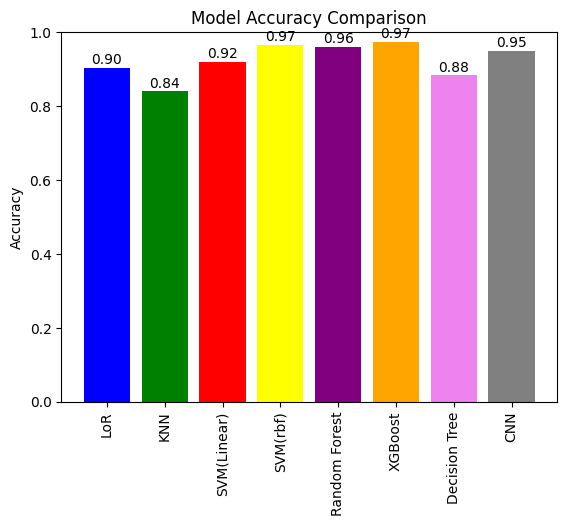

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


accuracy_values = [accuracy_lor, accuracy_knn, accuracy_svm_linear, accuracy_svm_rbf, accuracy_rf, accuracy_xgb, accuracy_dt, accuracy_cnn]
models = ['LoR', 'KNN', 'SVM(Linear)', 'SVM(rbf)', 'Random Forest', 'XGBoost', 'Decision Tree', 'CNN']

bar_width = 0.8

plt.bar(bar_positions, accuracy_values, color=['blue', 'green', 'red', 'yellow', 'purple', 'orange', 'violet', 'grey'], width=bar_width)
plt.xticks(bar_positions, models, rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1])

for i, value in zip(bar_positions, accuracy_values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center')

plt.show()



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Function to print confusion matrix and classification report
def print_evaluation_metrics(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    print(f"\nConfusion Matrix for {model_name}:\n{cm}\n")
    print(f"Classification Report for {model_name}:\n{report}\n")

# Confusion matrices and classification reports for all models
models = ['Logistic Regression', 'K-Nearest Neighbors', 'SVM (Linear)', 'SVM (RBF)', 'Random Forest', 'XGBoost', 'Decision Tree', 'CNN']

for i, model in enumerate([gscv_lor, gscv_knn, gscv_svm_linear, gscv_svm_rbf, clf_rf, clf_xgb, clf_dt, model]):
    if i < 7:
        y_pred = model.predict(features)
        print_evaluation_metrics(label_array, y_pred, models[i])
    else:
        y_pred_cnn = model.predict(x_test)
        y_pred_cnn_binary = (y_pred_cnn > 0.5).astype(int)
        print_evaluation_metrics(y_test, y_pred_cnn_binary, models[i])

# Create a result table
precision_recall_accuracy = []

for i, model in enumerate([gscv_lor, gscv_knn, gscv_svm_linear, gscv_svm_rbf, clf_rf, clf_xgb, clf_dt, model]):
    if i < 7:
        y_pred = model.predict(features)
        accuracy = metrics.accuracy_score(label_array, y_pred)
        precision = metrics.precision_score(label_array, y_pred)
        recall = metrics.recall_score(label_array, y_pred)
        precision_recall_accuracy.append([models[i], precision, recall, accuracy])
    else:
        y_pred_cnn = model.predict(x_test)
        y_pred_cnn_binary = (y_pred_cnn > 0.5).astype(int)
        accuracy_cnn = metrics.accuracy_score(y_test, y_pred_cnn_binary)
        precision_cnn = metrics.precision_score(y_test, y_pred_cnn_binary)
        recall_cnn = metrics.recall_score(y_test, y_pred_cnn_binary)
        precision_recall_accuracy.append(['CNN', precision_cnn, recall_cnn, accuracy_cnn])

result_table = pd.DataFrame(precision_recall_accuracy, columns=['Model', 'Precision', 'Recall', 'Accuracy'])
print("\nResult Table:\n", result_table)


NameError: ignored